# **Capstone Project - Dog Breed Classification & Object Detection**
**Woojong Choi**


## **Modeling**

### Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from keras.models import load_model
from tensorflow.keras.applications import VGG16, ResNet50, Xception
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, precision_score
from sklearn.metrics import recall_score, f1_score, accuracy_score

from IPython.display import Image, display

In [ ]:
# Reading image data and labels

train_data_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/train_data.npy'
train_labels_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/train_labels.npy'
val_data_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/val_data.npy'
val_labels_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/val_labels.npy'
test_data_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/test_data.npy'
test_labels_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/test_labels.npy'

# train_data = np.load(train_data_path)
# val_data = np.load(val_data_path)
# test_data = np.load(test_data_path)

train_labels = np.load(train_labels_path)
val_labels = np.load(val_labels_path)
test_labels = np.load(test_labels_path)

In [ ]:
# Reading breed categories

file_path = '/content/drive/MyDrive/general_assembly/capstone/other/breed_categories.pickle'

with open(file_path, 'rb') as f:
    categories = pickle.load(f)

num_classes = len(categories)

### Image preprocessing

In [ ]:
# Normalizing data

train_data_norm = train_data / 255.0
val_data_norm = val_data / 255.0
test_data_norm = test_data / 255.0

In [ ]:
# saving normalized data

save_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array'

np.save(os.path.join(save_path, 'train_data_norm.npy'), train_data_norm)
np.save(os.path.join(save_path, 'val_data_norm.npy'), val_data_norm)
np.save(os.path.join(save_path, 'test_data_norm.npy'), test_data_norm)

In [ ]:
train_data_norm.shape, train_labels.shape

((6405, 299, 299, 3), (6405,))

In [ ]:
val_data_norm.shape, val_labels.shape

((766, 299, 299, 3), (766,))

In [ ]:
train_labels

array([ 0,  0,  0, ..., 92, 92, 92])

In [ ]:
# One hot encoding labels

train_labels_onehot = to_categorical(train_labels, num_classes=num_classes)
val_labels_onehot = to_categorical(val_labels, num_classes=num_classes)
test_labels_onehot = to_categorical(test_labels, num_classes=num_classes)

In [ ]:
# saving One Hot Encoded labels

save_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array'

np.save(os.path.join(save_path, 'train_labels_onehot.npy'), train_labels_onehot)
np.save(os.path.join(save_path, 'val_labels_onehot.npy'), val_labels_onehot)
np.save(os.path.join(save_path, 'test_labels_onehot.npy'), test_labels_onehot)

### Modeling

In [ ]:
# Reading normalized data

train_data_norm_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/train_data_norm.npy'
val_data_norm_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/val_data_norm.npy'
test_data_norm_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/test_data_norm.npy'

train_data_norm = np.load(train_data_norm_path)
val_data_norm = np.load(val_data_norm_path)
test_data_norm = np.load(test_data_norm_path)

In [ ]:
# Reading One Hot Encoded labels

train_labels_onehot_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/train_labels_onehot.npy'
val_labels_onehot_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/val_labels_onehot.npy'
test_labels_onehot_path = '/content/drive/MyDrive/general_assembly/capstone/train_val_test_data_array/test_labels_onehot.npy'

train_labels_onehot = np.load(train_labels_onehot_path)
val_labels_onehot = np.load(val_labels_onehot_path)
test_labels_onehot = np.load(test_labels_onehot_path)

#### **Model 1**
- 3 Convolutional layers
- 1 Dense layer

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=train_data[0].shape))
model1.add(MaxPooling2D(2))

model1.add(Conv2D(64, 3, activation='relu'))
model1.add(MaxPooling2D(2))

model1.add(Conv2D(128, 3, activation='relu'))
model1.add(MaxPooling2D(2))

model1.add(Flatten())

model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(train_data_norm, train_labels_onehot,
                    validation_data=(val_data_norm, val_labels_onehot),
                    epochs=10,
                    batch_size=128)

Epoch 1/10
51/51 [==============================] - 37s 412ms/step - loss: 4.6494 - accuracy: 0.0194 - val_loss: 4.4238 - val_accuracy: 0.0313
Epoch 2/10
51/51 [==============================] - 16s 308ms/step - loss: 4.1481 - accuracy: 0.0720 - val_loss: 4.1488 - val_accuracy: 0.0666
Epoch 3/10
51/51 [==============================] - 16s 312ms/step - loss: 3.3237 - accuracy: 0.2205 - val_loss: 4.4053 - val_accuracy: 0.0757
Epoch 4/10
51/51 [==============================] - 16s 316ms/step - loss: 1.5498 - accuracy: 0.6180 - val_loss: 6.0036 - val_accuracy: 0.0757
Epoch 5/10
51/51 [==============================] - 16s 320ms/step - loss: 0.3765 - accuracy: 0.9084 - val_loss: 9.2367 - val_accuracy: 0.0574
Epoch 6/10
51/51 [==============================] - 17s 324ms/step - loss: 0.0708 - accuracy: 0.9883 - val_loss: 10.7067 - val_accuracy: 0.0666
Epoch 7/10
51/51 [==============================] - 16s 323ms/step - loss: 0.0211 - accuracy: 0.9970 - val_loss: 11.9767 - val_accuracy: 0.06

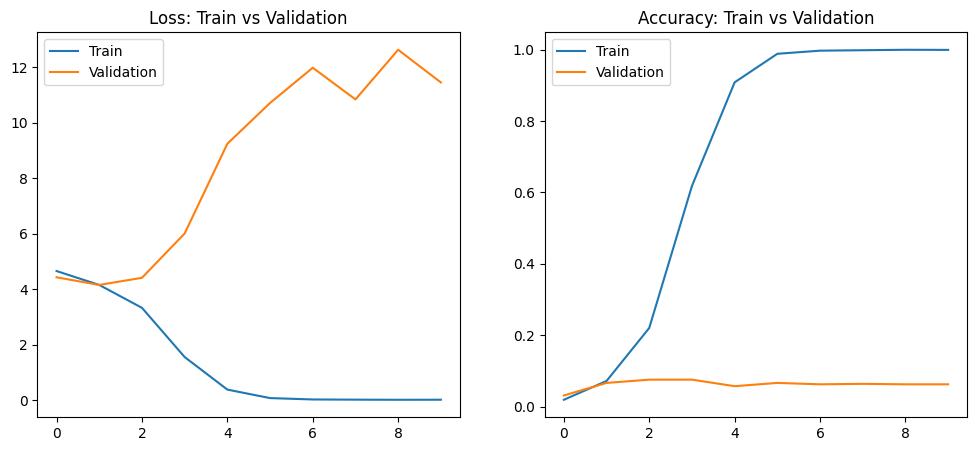

In [ ]:
plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(history1.history['loss'], label='Train')
ax1.plot(history1.history['val_loss'], label='Validation')
ax1.set_title('Loss: Train vs Validation')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history1.history['accuracy'], label='Train')
ax2.plot(history1.history['val_accuracy'], label='Validation')
ax2.set_title('Accuracy: Train vs Validation')
ax2.legend()

plt.savefig('/content/drive/MyDrive/general_assembly/capstone/assets/model1_loss_accuracy.jpg');

In [ ]:
history1.history['accuracy'][-1], history1.history['val_accuracy'][-1]

(0.9992193579673767, 0.06266318261623383)

The first simple model did extremely poorly and the model did not converge at all.

#### **Model 2**
- 4 Convolutional layers
- 2 Dense layers

In [ ]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=train_data_norm[0].shape))
model2.add(MaxPooling2D(2))

model2.add(Conv2D(64, 3, activation='relu'))
model2.add(MaxPooling2D(2))

model2.add(Conv2D(128, 3, activation='relu'))
model2.add(MaxPooling2D(2))

model2.add(Conv2D(256, 3, activation='relu'))
model2.add(MaxPooling2D(2))

model2.add(Conv2D(512, 3, activation='relu'))
model2.add(MaxPooling2D(2))

model2.add(Flatten())

model2.add(Dense(num_classes*2, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history2 = model2.fit(train_data_norm, train_labels_onehot,
                    validation_data=(val_data_norm, val_labels_onehot),
                    epochs=20,
                    batch_size=128)

Epoch 1/20
51/51 [==============================] - 44s 488ms/step - loss: 4.5330 - accuracy: 0.0131 - val_loss: 4.5299 - val_accuracy: 0.0131
Epoch 2/20
51/51 [==============================] - 18s 358ms/step - loss: 4.5289 - accuracy: 0.0151 - val_loss: 4.5219 - val_accuracy: 0.0209
Epoch 3/20
51/51 [==============================] - 18s 359ms/step - loss: 4.5230 - accuracy: 0.0155 - val_loss: 4.4865 - val_accuracy: 0.0144
Epoch 4/20
51/51 [==============================] - 18s 359ms/step - loss: 4.4463 - accuracy: 0.0219 - val_loss: 4.3713 - val_accuracy: 0.0196
Epoch 5/20
51/51 [==============================] - 18s 357ms/step - loss: 4.3438 - accuracy: 0.0298 - val_loss: 4.3669 - val_accuracy: 0.0209
Epoch 6/20
51/51 [==============================] - 18s 356ms/step - loss: 4.2477 - accuracy: 0.0403 - val_loss: 4.2915 - val_accuracy: 0.0431
Epoch 7/20
51/51 [==============================] - 18s 358ms/step - loss: 4.1293 - accuracy: 0.0590 - val_loss: 4.2290 - val_accuracy: 0.0392

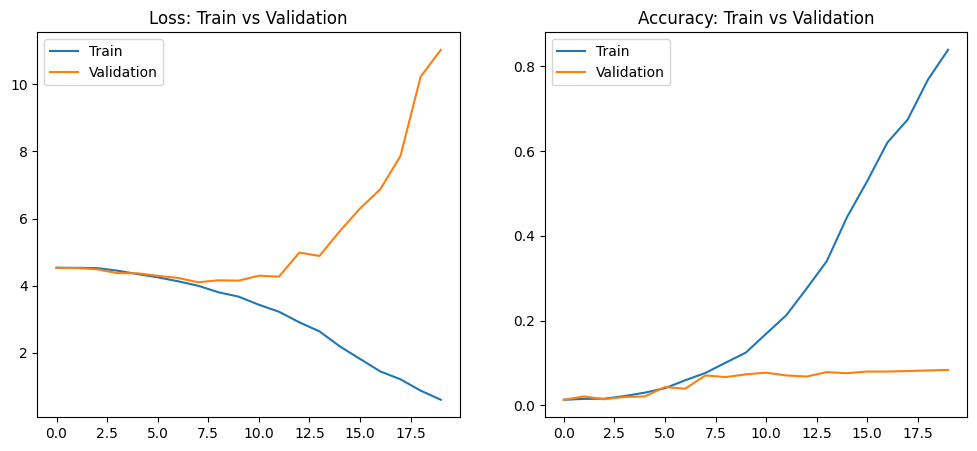

In [ ]:
# Plotting loss and accruacy

plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(history2.history['loss'], label='Train')
ax1.plot(history2.history['val_loss'], label='Validation')
ax1.set_title('Loss: Train vs Validation')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history2.history['accuracy'], label='Train')
ax2.plot(history2.history['val_accuracy'], label='Validation')
ax2.set_title('Accuracy: Train vs Validation')
ax2.legend()

plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/model2_loss_accuracy.jpg');

In [ ]:
history2.history['accuracy'][-1], history2.history['val_accuracy'][-1]

(0.8387197256088257, 0.08355091512203217)

The second iteration did better than the first model, but it is severely overfitting. Moving on to pretrained models.

#### **Model 3 (VGG-16)**
- Data Augmentation
- GlobalAveragePooling2D (For feature extraction, reduce overfitting)
- Batch Normalizataion (For improving statbility and convergence)
- 3 Dense layers
- Early stopping

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(train_data_norm, train_labels_onehot, batch_size=batch_size)
val_generator = val_datagen.flow(val_data_norm, val_labels_onehot, batch_size=batch_size)

base_model = VGG16(input_shape=train_data_norm[0].shape, include_top=False, weights='imagenet')

model3 = Sequential()
model3.add(base_model)
model3.add(GlobalAveragePooling2D())

model3.add(Dropout(0.5))
model3.add(BatchNormalization())

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())

model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())

model3.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
model3.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history3 = model3.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=50,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[lr_scheduler, es])

58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/50
201/201 [==============================] - 200s 815ms/step - loss: 4.9229 - accuracy: 0.0087 - val_loss: 4.5807 - val_accuracy: 0.0131 - lr: 1.0000e-04
Epoch 2/50
201/201 [==============================] - 152s 755ms/step - loss: 4.9097 - accuracy: 0.0111 - val_loss: 4.6465 - val_accuracy: 0.0131 - lr: 1.0000e-04
Epoch 3/50
201/201 [==============================] - 152s 755ms/step - loss: 4.8883 - accuracy: 0.0087 - val_loss: 6.8195 - val_accuracy: 0.0091 - lr: 1.0000e-04
Epoch 4/50
201/201 [==============================] - ETA: 0s - loss: 4.8600 - accuracy: 0.0134
Epoch 4: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
201/201 [==============================] - 152s 754ms/step - loss: 4.8600 - accuracy: 0.0134 - val_loss: 4.6339 - val_accuracy: 0.0104 - lr: 1.0000e-04
Epoch 5/50
201/201 [==============================] - 152s 752ms/step - loss: 4.8696 - accuracy: 0.0131 - val_loss: 4.5708

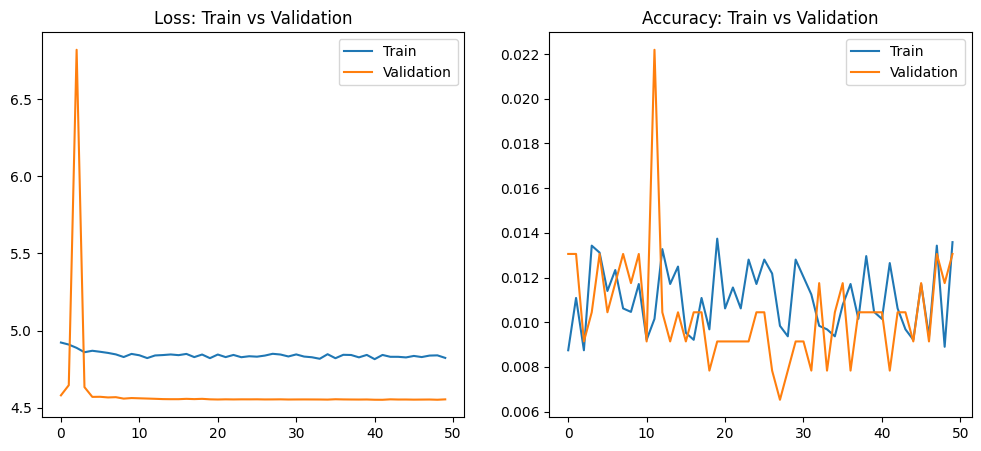

In [ ]:
# Plotting loss and accruacy

plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(history3.history['loss'], label='Train')
ax1.plot(history3.history['val_loss'], label='Validation')
ax1.set_title('Loss: Train vs Validation')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history3.history['accuracy'], label='Train')
ax2.plot(history3.history['val_accuracy'], label='Validation')
ax2.set_title('Accuracy: Train vs Validation')
ax2.legend()

plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/vgg16_loss_accuracy.jpg');

In [ ]:
history3.history['accuracy'][-1], history3.history['val_accuracy'][-1]

(0.013583138585090637, 0.013054830022156239)

Using VGG16 as the base model and adding dense layers did not improve the model performance and the model failed to converge.

#### **Model 5 (ResNet50)**
- Data Augmentation
- GlobalAveragePooling2D (For feature extraction, reduce overfitting)
- Batch Normalizataion (For improving statbility and convergence)
- 3 Dense layers
- Early stopping

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(train_data_norm, train_labels_onehot, batch_size=batch_size)
val_generator = val_datagen.flow(val_data_norm, val_labels_onehot, batch_size=batch_size)

base_model = ResNet50(input_shape=train_data_norm[0].shape, include_top=False, weights='imagenet')

model5 = Sequential()
model5.add(base_model)
model5.add(GlobalAveragePooling2D())

model5.add(Dropout(0.5))
model5.add(BatchNormalization())

model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(BatchNormalization())

model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.5))
model5.add(BatchNormalization())

model5.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
model5.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history5 = model5.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=50,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[lr_scheduler, es])

94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/50
201/201 [==============================] - 173s 643ms/step - loss: 4.8136 - accuracy: 0.0136 - val_loss: 4.8420 - val_accuracy: 0.0144 - lr: 1.0000e-04
Epoch 2/50
201/201 [==============================] - 125s 617ms/step - loss: 4.5972 - accuracy: 0.0259 - val_loss: 4.8507 - val_accuracy: 0.0104 - lr: 1.0000e-04
Epoch 3/50
201/201 [==============================] - 125s 618ms/step - loss: 4.4307 - accuracy: 0.0414 - val_loss: 4.5635 - val_accuracy: 0.0170 - lr: 1.0000e-04
Epoch 4/50
201/201 [==============================] - 125s 618ms/step - loss: 4.2819 - accuracy: 0.0536 - val_loss: 4.3727 - val_accuracy: 0.0431 - lr: 1.0000e-04
Epoch 5/50
201/201 [==============================] - 125s 618ms/step - loss: 4.1997 - accuracy: 0.0665 - val_loss: 3.8023 - val_accuracy: 0.2076 - lr: 1.0000e-04
Epoch 6/50
201/201 [==============================] - 125s 619ms/step - loss: 4.0753 - accuracy: 0.0876 - val_loss: 3.67

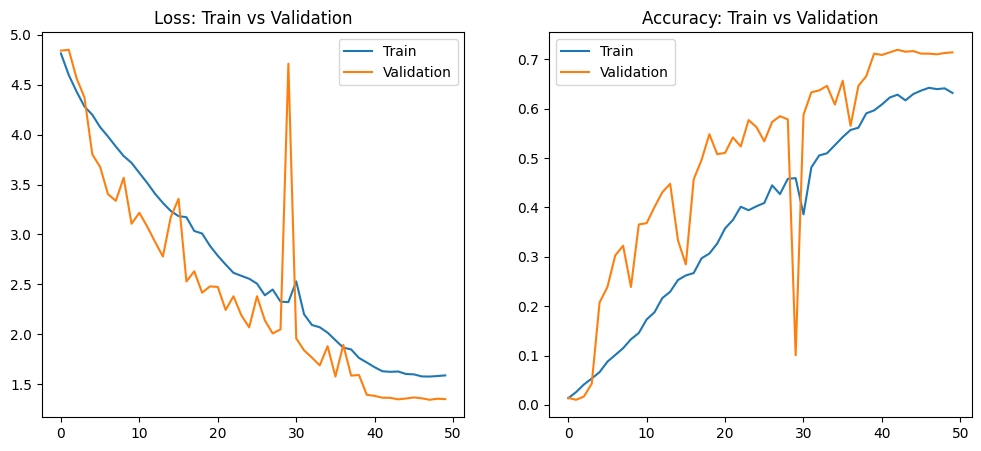

In [ ]:
# Plotting loss and accruacy

plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(history5.history['loss'], label='Train')
ax1.plot(history5.history['val_loss'], label='Validation')
ax1.set_title('Loss: Train vs Validation')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history5.history['accuracy'], label='Train')
ax2.plot(history5.history['val_accuracy'], label='Validation')
ax2.set_title('Accuracy: Train vs Validation')
ax2.legend()

plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/resnet50_loss_accuracy.jpg');

In [ ]:
history5.history['accuracy'][-1], history5.history['val_accuracy'][-1]

(0.6318501234054565, 0.7140992283821106)

ResNet50 significanlty outperformed VGG16. However, this model is showing signs of underfitting. Moving to Xception.

#### **Model 4 (Xception)**
- Data Augmentation
- GlobalAveragePooling2D (For feature extraction, reduce overfitting)
- Batch Normalizataion (For improving statbility and convergence)
- 3 Dense layers
- Early stopping

In [ ]:
# Create data generators with data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(train_data_norm, train_labels_onehot, batch_size=batch_size)
val_generator = val_datagen.flow(val_data_norm, val_labels_onehot, batch_size=batch_size)

base_model = Xception(input_shape=train_data_norm[0].shape, include_top=False, weights='imagenet')

model4 = Sequential()
model4.add(base_model)
model4.add(GlobalAveragePooling2D())

model4.add(Dropout(0.5))
model4.add(BatchNormalization())

model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(BatchNormalization())

model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(BatchNormalization())

model4.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
model4.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history4 = model4.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=50,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[lr_scheduler, es])

Epoch 1/50
201/201 [==============================] - 215s 894ms/step - loss: 4.6709 - accuracy: 0.0180 - val_loss: 4.1461 - val_accuracy: 0.1540 - lr: 1.0000e-04
Epoch 2/50
201/201 [==============================] - 174s 861ms/step - loss: 4.2812 - accuracy: 0.0553 - val_loss: 3.5424 - val_accuracy: 0.5078 - lr: 1.0000e-04
Epoch 3/50
201/201 [==============================] - 174s 861ms/step - loss: 4.0007 - accuracy: 0.1051 - val_loss: 3.1542 - val_accuracy: 0.6149 - lr: 1.0000e-04
Epoch 4/50
201/201 [==============================] - 174s 862ms/step - loss: 3.7754 - accuracy: 0.1524 - val_loss: 2.8778 - val_accuracy: 0.6815 - lr: 1.0000e-04
Epoch 5/50
201/201 [==============================] - 174s 862ms/step - loss: 3.6024 - accuracy: 0.2030 - val_loss: 2.7616 - val_accuracy: 0.6958 - lr: 1.0000e-04
Epoch 6/50
201/201 [==============================] - 174s 862ms/step - loss: 3.4333 - accuracy: 0.2465 - val_loss: 2.6250 - val_accuracy: 0.7206 - lr: 1.0000e-04
Epoch 7/50
201/201 [==

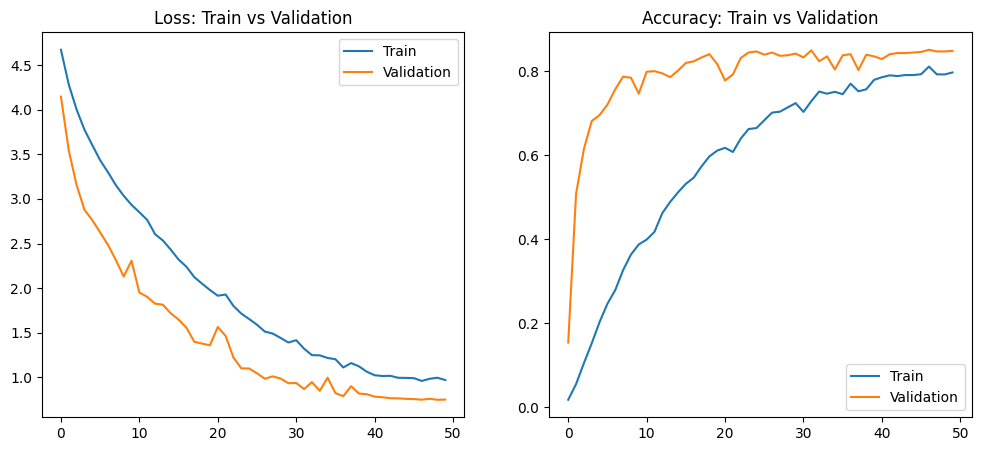

In [ ]:
# Plotting loss and accruacy

plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(history4.history['loss'], label='Train')
ax1.plot(history4.history['val_loss'], label='Validation')
ax1.set_title('Loss: Train vs Validation')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history4.history['accuracy'], label='Train')
ax2.plot(history4.history['val_accuracy'], label='Validation')
ax2.set_title('Accuracy: Train vs Validation')
ax2.legend()

plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/xception_loss_accuracy.jpg');

In [ ]:
history4.history['accuracy'][-1], history4.history['val_accuracy'][-1]

(0.7971897125244141, 0.8485639691352844)

In [ ]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_14 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dropout_7 (Dropout)         (None, 128)              

In [ ]:
# saving model

model4.save('/content/drive/MyDrive/general_assembly/capstone/model/xception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# saving model - alternative approach

model4.save('/content/drive/MyDrive/general_assembly/capstone/model/xception.keras')

The Xception model produced significantly better results compared to previous models, including another pretrained model, VGG16. There are several reasons why Xception outperformed VGG16, which may include:
- Xception features a more modern and complex architecture than VGG16, providing it with a greater capacity to capture intricate features and patterns in the images.
- Xception may have learned features that are more transferable to the images in comparison to VGG16."

#### **Model 6 (Xception)**
- Data Augmentation (updated)
- RMSProp for final layer (instead of Adam)
- 100 epochs (vs 50)
- Regularization (L2)
- GlobalAveragePooling2D (For feature extraction, reduce overfitting)
- Batch Normalizataion (For improving statbility and convergence)
- 3 Dense layers
- Early stopping

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(train_data_norm, train_labels_onehot, batch_size=batch_size)
val_generator = val_datagen.flow(val_data_norm, val_labels_onehot, batch_size=batch_size)

base_model = Xception(input_shape=train_data_norm[0].shape, include_top=False, weights='imagenet')

model6 = Sequential()
model6.add(base_model)
model6.add(GlobalAveragePooling2D())
model6.add(Dropout(0.5))

model6.add(BatchNormalization())
model6.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model6.add(Dropout(0.5))

model6.add(BatchNormalization())
model6.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model6.add(Dropout(0.5))

model6.add(BatchNormalization())
model6.add(Dense(num_classes, activation='softmax'))

optimizer = RMSprop(learning_rate=0.0001)
model6.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_lr=1e-6)
es = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)

history6 = model6.fit(train_generator,
                      steps_per_epoch=len(train_generator),
                      epochs=100,
                      validation_data=val_generator,
                      validation_steps=len(val_generator),
                      callbacks=[lr_scheduler, es])

Epoch 1/100
201/201 [==============================] - 218s 883ms/step - loss: 5.0326 - accuracy: 0.0195 - val_loss: 4.4698 - val_accuracy: 0.1580 - lr: 1.0000e-04
Epoch 2/100
201/201 [==============================] - 174s 865ms/step - loss: 4.6706 - accuracy: 0.0509 - val_loss: 3.9251 - val_accuracy: 0.4334 - lr: 1.0000e-04
Epoch 3/100
201/201 [==============================] - 175s 866ms/step - loss: 4.3813 - accuracy: 0.0882 - val_loss: 3.5197 - val_accuracy: 0.6018 - lr: 1.0000e-04
Epoch 4/100
201/201 [==============================] - 174s 865ms/step - loss: 4.1565 - accuracy: 0.1375 - val_loss: 3.2905 - val_accuracy: 0.6567 - lr: 1.0000e-04
Epoch 5/100
201/201 [==============================] - 175s 866ms/step - loss: 3.9739 - accuracy: 0.1813 - val_loss: 3.1537 - val_accuracy: 0.6893 - lr: 1.0000e-04
Epoch 6/100
201/201 [==============================] - 174s 865ms/step - loss: 3.7957 - accuracy: 0.2273 - val_loss: 2.8672 - val_accuracy: 0.7402 - lr: 1.0000e-04
Epoch 7/100
201/

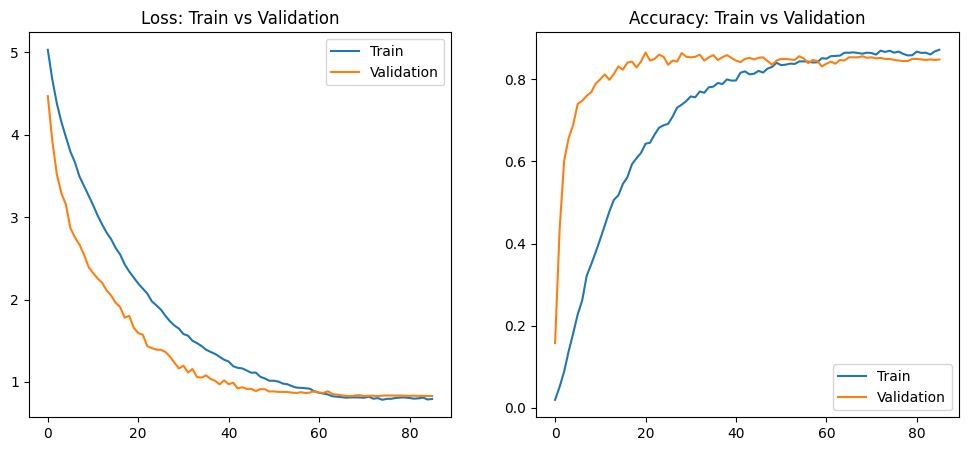

In [ ]:
# Plotting loss and accruacy

plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(history6.history['loss'], label='Train')
ax1.plot(history6.history['val_loss'], label='Validation')
ax1.set_title('Loss: Train vs Validation')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(history6.history['accuracy'], label='Train')
ax2.plot(history6.history['val_accuracy'], label='Validation')
ax2.set_title('Accuracy: Train vs Validation')
ax2.legend()

plt.savefig('/content/drive/MyDrive/general_assembly/group_project/assets/xception2_loss_accuracy.jpg');

In [ ]:
history6.history['accuracy'][-1], history6.history['val_accuracy'][-1]

(0.8721311688423157, 0.8485639691352844)

In [ ]:
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 batch_normalization_4 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [ ]:
# saving model

model6.save('/content/drive/MyDrive/general_assembly/capstone/model/xception2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Xception delivered the best overall results. While the final model does exhibit a slight sign of overfitting, it is marginal.

## **Evaluation**

In [ ]:
# Loading best model - Xception

model = load_model('/content/drive/MyDrive/general_assembly/capstone/model/xception2.h5')

In [ ]:
test_data_norm.shape, test_labels_onehot.shape

((891, 299, 299, 3), (891, 93))

In [ ]:
# Test Loss and Accuracy

loss, accuracy = model.evaluate(test_data_norm, test_labels_onehot, verbose=1)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

28/28 [==============================] - 18s 280ms/step - loss: 0.6163 - accuracy: 0.8967
Test Loss: 0.6163434386253357
Test Accuracy: 0.8967452049255371


In [ ]:
# Predictions

preds = model.predict(test_data_norm)
predicted_labels = np.argmax(preds, axis=1)
predicted_labels

28/28 [==============================] - 6s 206ms/step


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 78,  0,  0,  1,  1,  1,  1,
       21,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3, 32,  3,  4,  4,  4,  4,  4,
        4,  4, 71,  4,  5,  5,  5,  5,  5,  5,  5, 30,  5,  5,  5,  6,  6,
        6,  6, 48,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
       74,  7,  7,  8,  8,  8, 10,  8,  8,  8, 73,  8,  9,  9,  9, 42,  9,
        9, 24,  9,  9,  9,  9, 10, 10, 10, 10, 71, 10, 10, 10, 10, 11, 11,
       11, 11, 11, 11, 11, 73, 11, 40, 12, 12, 12, 12, 12, 12, 25, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 17, 17, 17, 72, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 87, 20,
       20, 20, 20, 20, 20, 21, 88, 21, 88, 21, 21, 21, 88, 21, 22, 22, 22,
       22, 22, 22, 22, 85

In [ ]:
# precision

precision = precision_score(test_labels, predicted_labels, average='weighted')
print(f'Precision: {precision}')

Precision: 0.9061235310393558


In [ ]:
# recall

recall = recall_score(test_labels, predicted_labels, average='weighted')
print(f'Recall: {recall}')

Recall: 0.8967452300785634


In [ ]:
# f1-score

f1 = f1_score(test_labels, predicted_labels, average='weighted')
print(f'F1-Score: {f1}')

F1-Score: 0.8964747982862951


In [ ]:
# classification report
class_report = classification_report(test_labels, predicted_labels, target_names=categories)
print(class_report)

                             precision    recall  f1-score   support

               Afghan Hound       1.00      0.92      0.96        13
        African Hunting Dog       1.00      0.90      0.95        10
                   Airedale       0.86      1.00      0.92        12
                    Basenji       0.77      0.91      0.83        11
                     Basset       1.00      0.89      0.94         9
                     Beagle       0.83      0.91      0.87        11
         Bedlington Terrier       0.82      0.90      0.86        10
       Bernese Mountain Dog       1.00      0.92      0.96        12
    Black And Tan Coonhound       0.78      0.78      0.78         9
           Blenheim Spaniel       1.00      0.82      0.90        11
                 Bloodhound       0.80      0.89      0.84         9
                   Bluetick       1.00      0.89      0.94         9
              Border Collie       0.86      0.75      0.80         8
             Border Terrier      

The best model produced exceptional good results when test against the test images.
- Accuracy: 0.90
- Precision: 0.91
- Recall: 0.90
- f1-score: 0.90

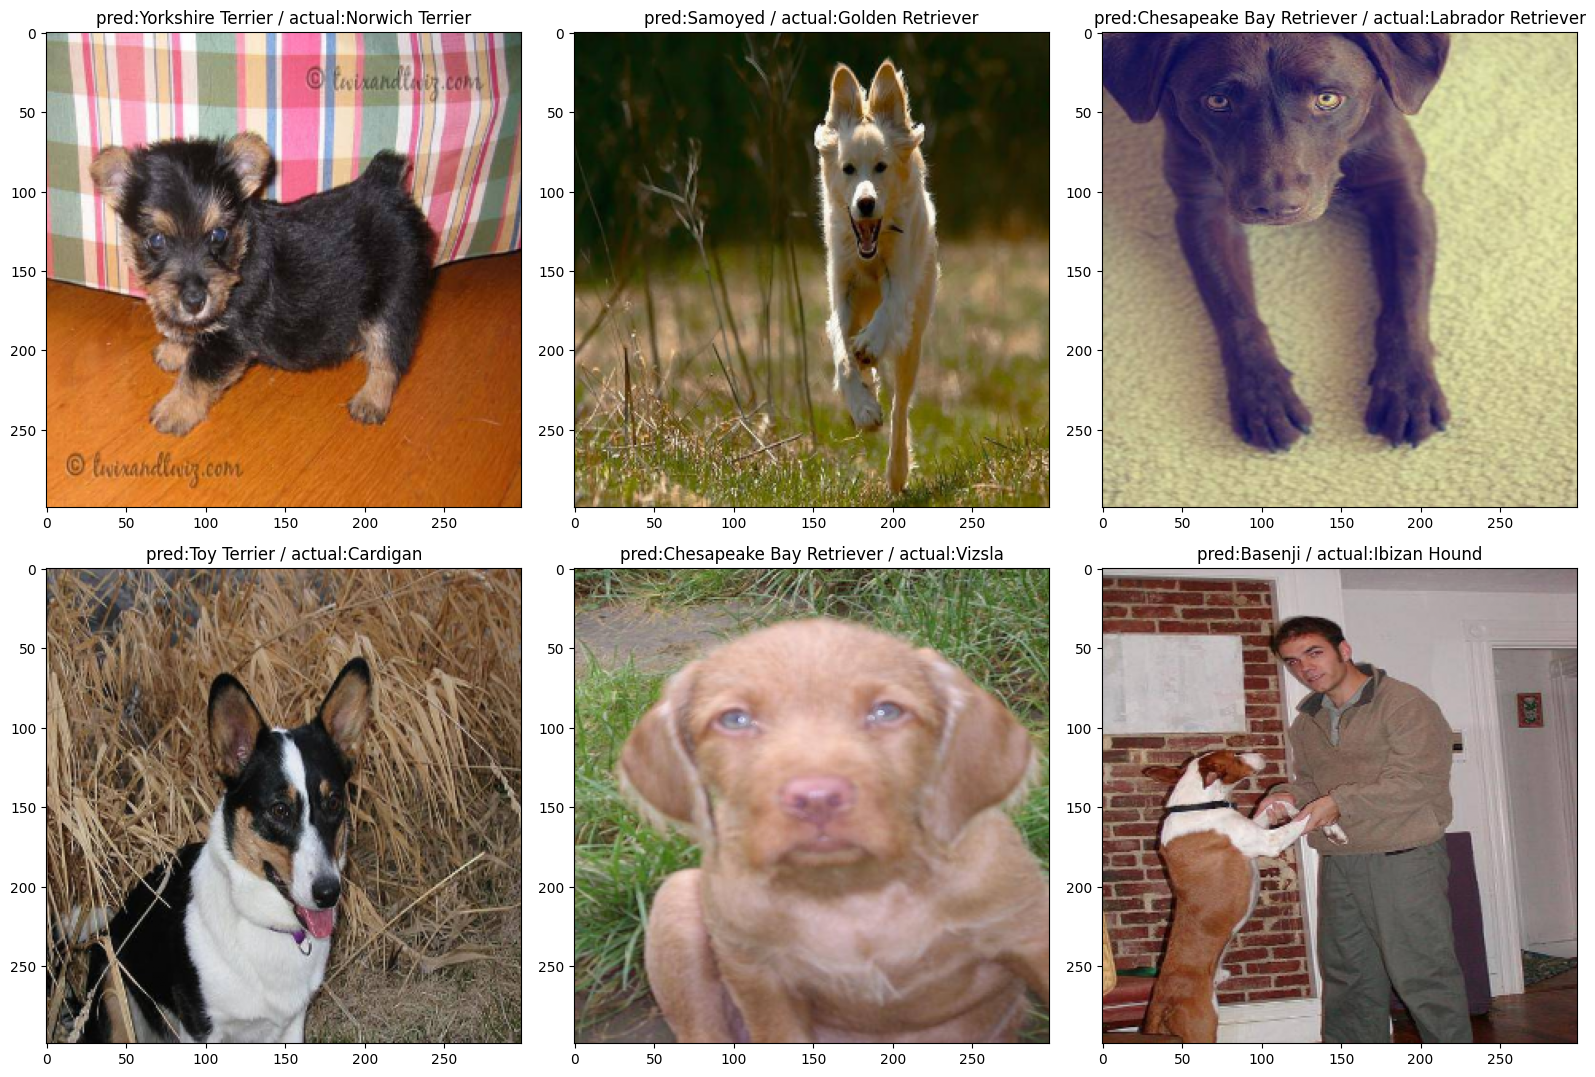

In [ ]:
# examples of misclassified images

miss_indices = np.where(predicted_labels != test_labels)[0]

random_miss_indices = np.random.choice(miss_indices, 6, replace=False)

miss_data = test_data_norm[random_miss_indices]
miss_true_labels = test_labels[random_miss_indices]
miss_preds = predicted_labels[random_miss_indices]

plt.figure(figsize=(16, 16))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.title(f'pred:{categories[miss_preds[i]]} / actual:{categories[miss_true_labels[i]]}')
    plt.imshow(test_data_norm[random_miss_indices[i]])
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/general_assembly/capstone/assets/miss_classifications2.jpg')
plt.show()

Some of the misclassified images are not straightforward, even for humans. This strongly suggests that the model is likely performing at its peak.

## **Predictions**

### Prediction output: Single Breed

In [ ]:
def classify_dog_breed_image(image_path, model, class_labels):
    '''
    Takes an image path, model, and class labels as input and produces the name of the breed
    '''
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))
    img_array = np.array(img)
    img_array_norm = img_array / 255.0

    preds = model.predict(np.expand_dims(img_array_norm, axis=0))
    predicted_class_index = np.argmax(preds)
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

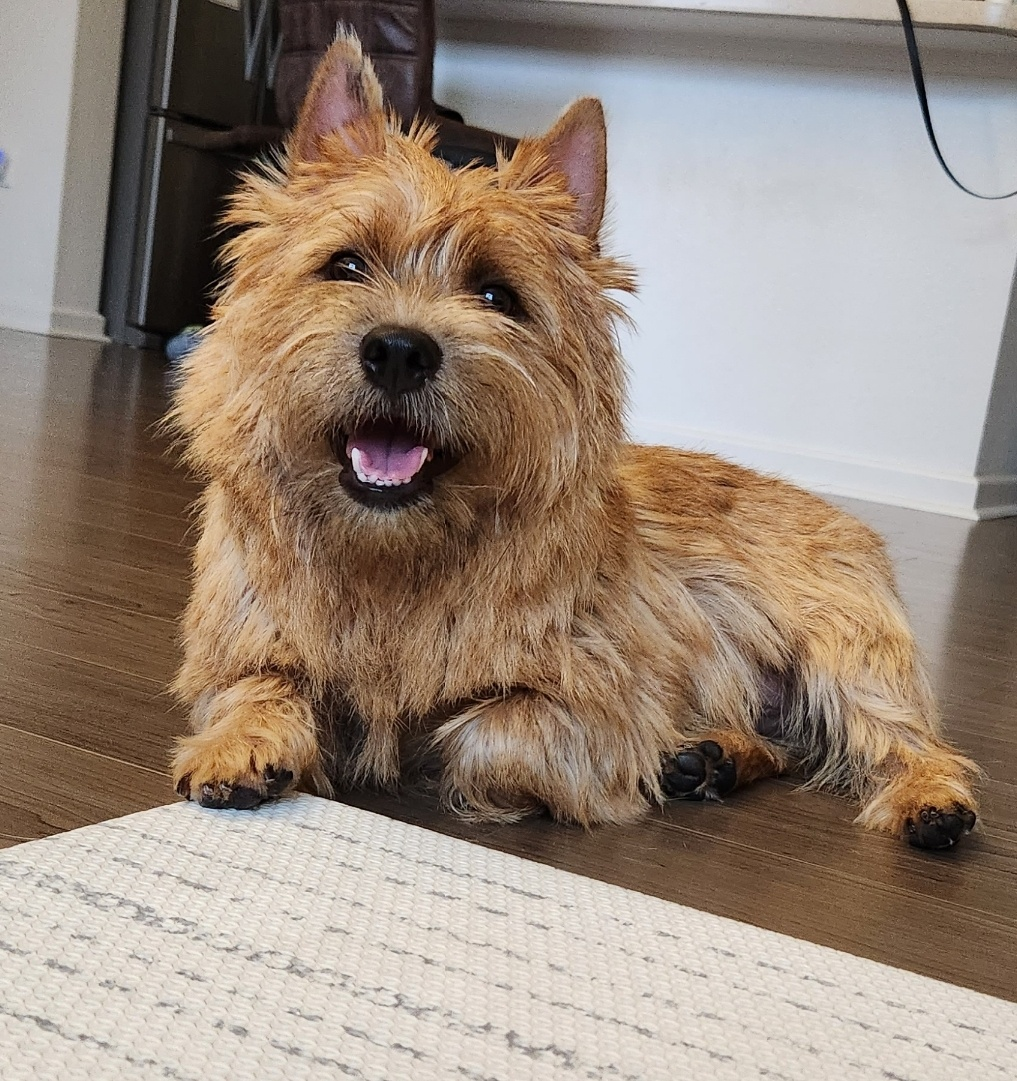

1/1 [==============================] - 1s 584ms/step


'Norwich Terrier'

In [ ]:
image_path = '/content/drive/MyDrive/general_assembly/capstone/image/sample1.jpg'
display(Image(filename=image_path, width=300))
classify_dog_breed_image(image_path, model, categories)

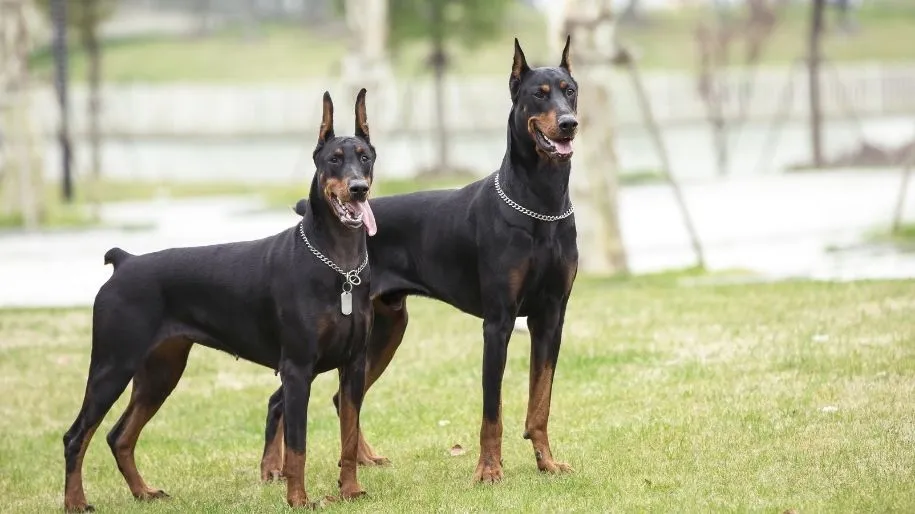

1/1 [==============================] - 0s 23ms/step


'Doberman'

In [ ]:
image_path = '/content/drive/MyDrive/general_assembly/capstone/image/sample2.jpg'
display(Image(filename=image_path, width=300))
classify_dog_breed_image(image_path, model, categories)

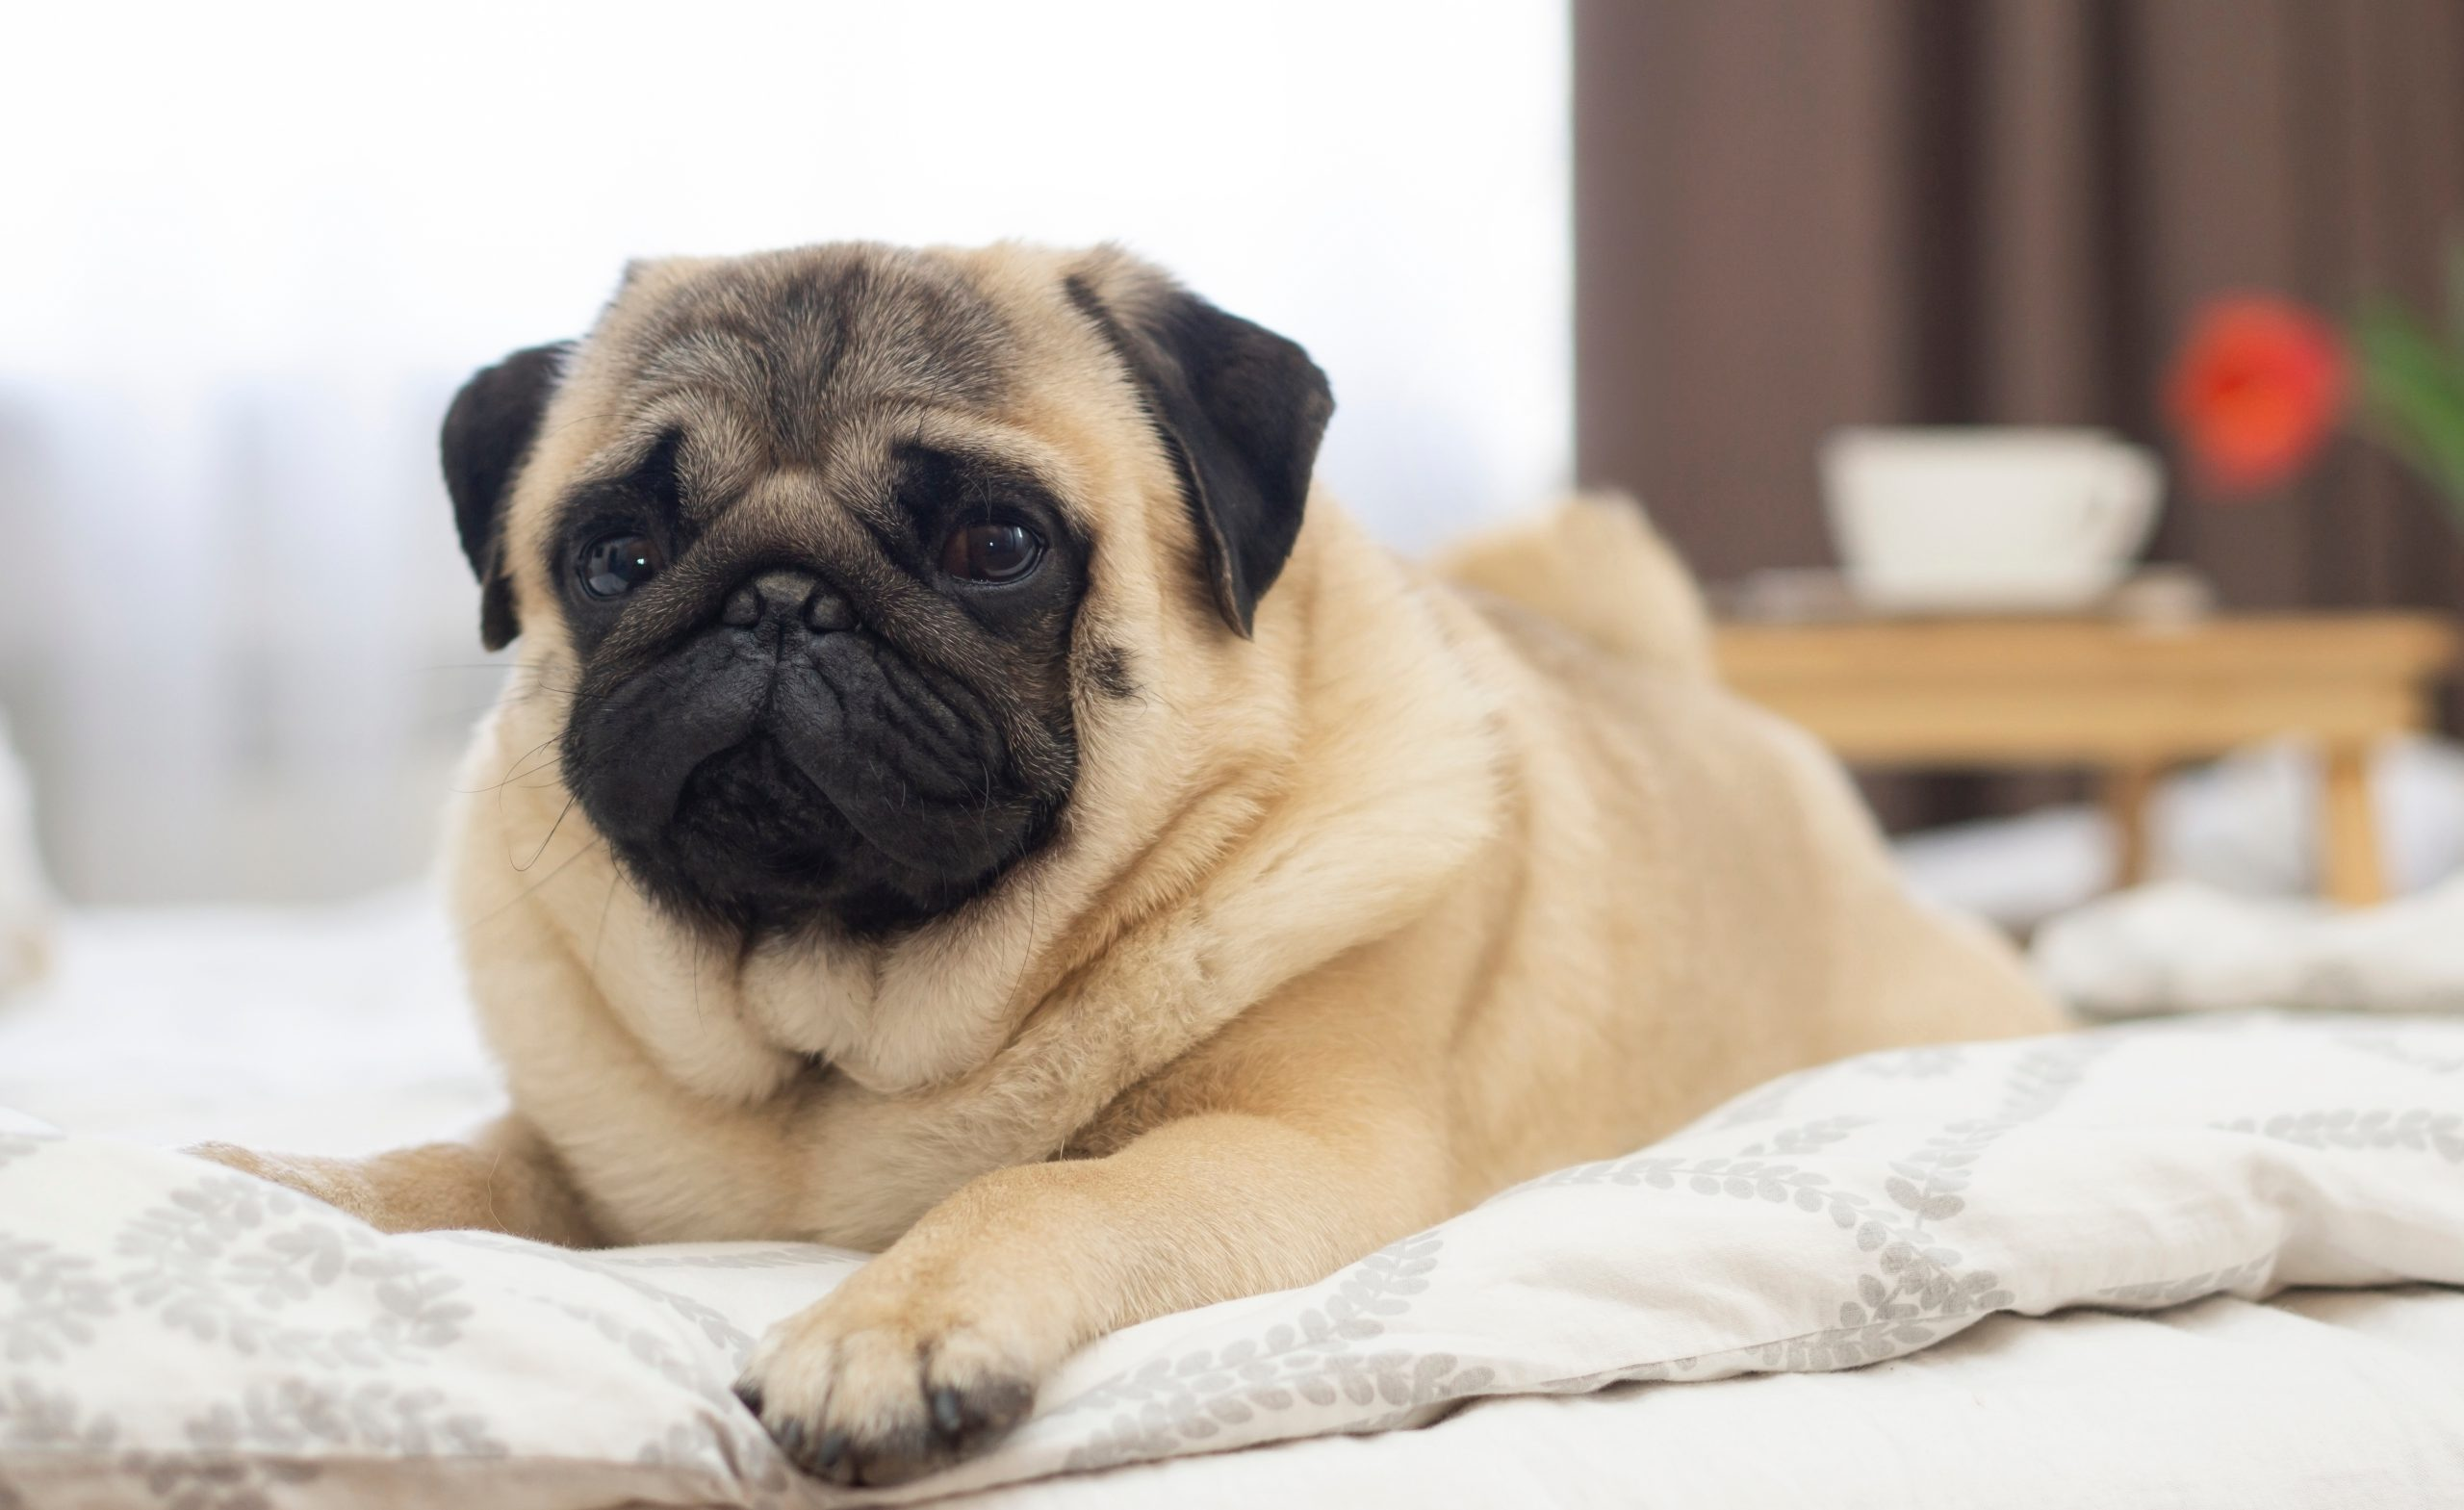

1/1 [==============================] - 0s 23ms/step


'Pug'

In [ ]:
image_path = '/content/drive/MyDrive/general_assembly/capstone/image/sample3.jpg'
display(Image(filename=image_path, width=300))
classify_dog_breed_image(image_path, model, categories)

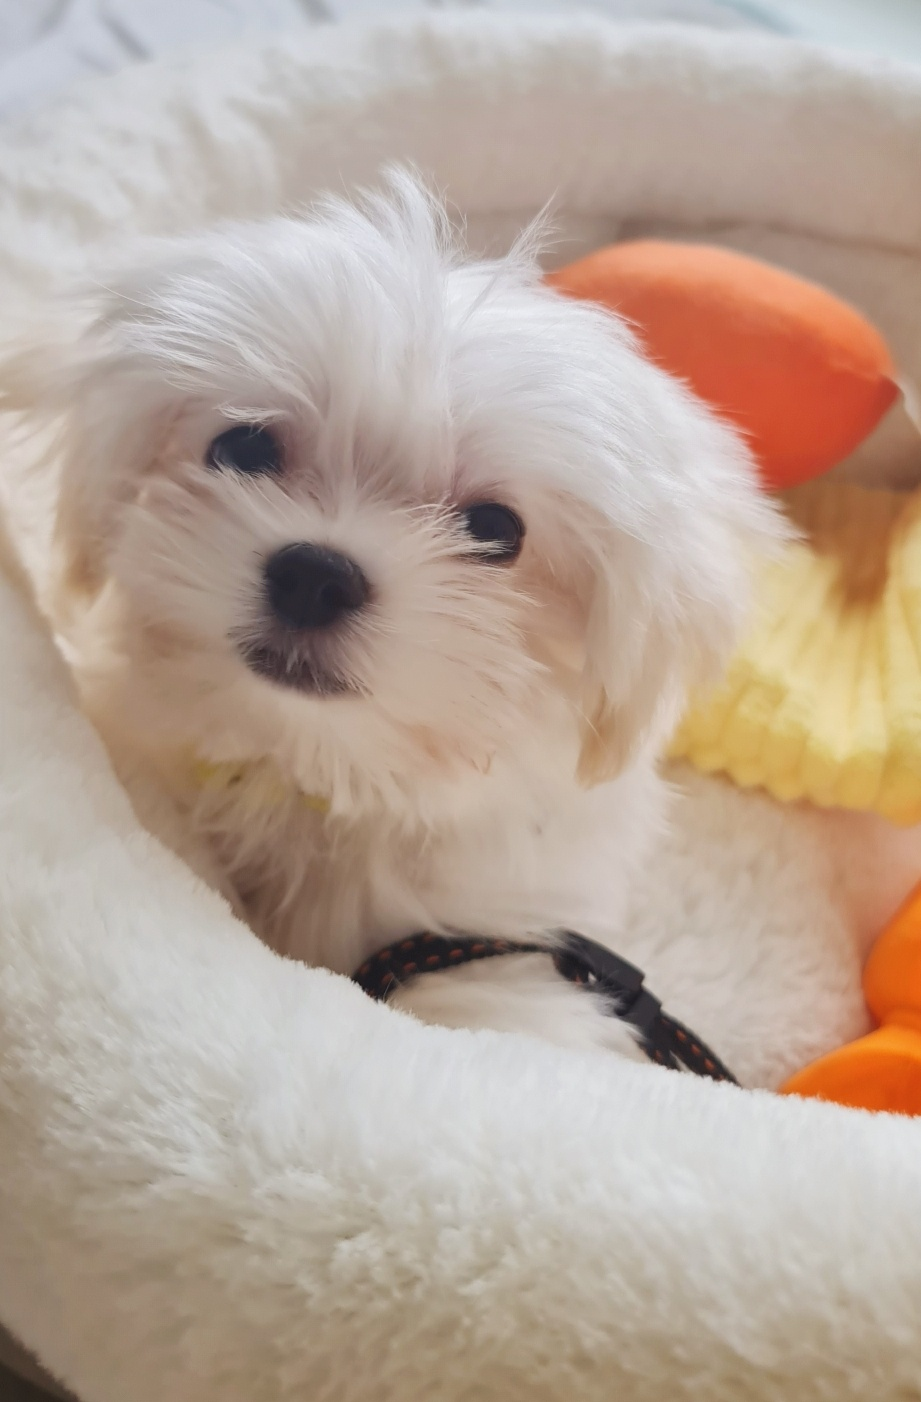

1/1 [==============================] - 0s 21ms/step


'Maltese'

In [ ]:
image_path = '/content/drive/MyDrive/general_assembly/capstone/image/sample4.jpg'
display(Image(filename=image_path, width=300))
classify_dog_breed_image(image_path, model, categories)

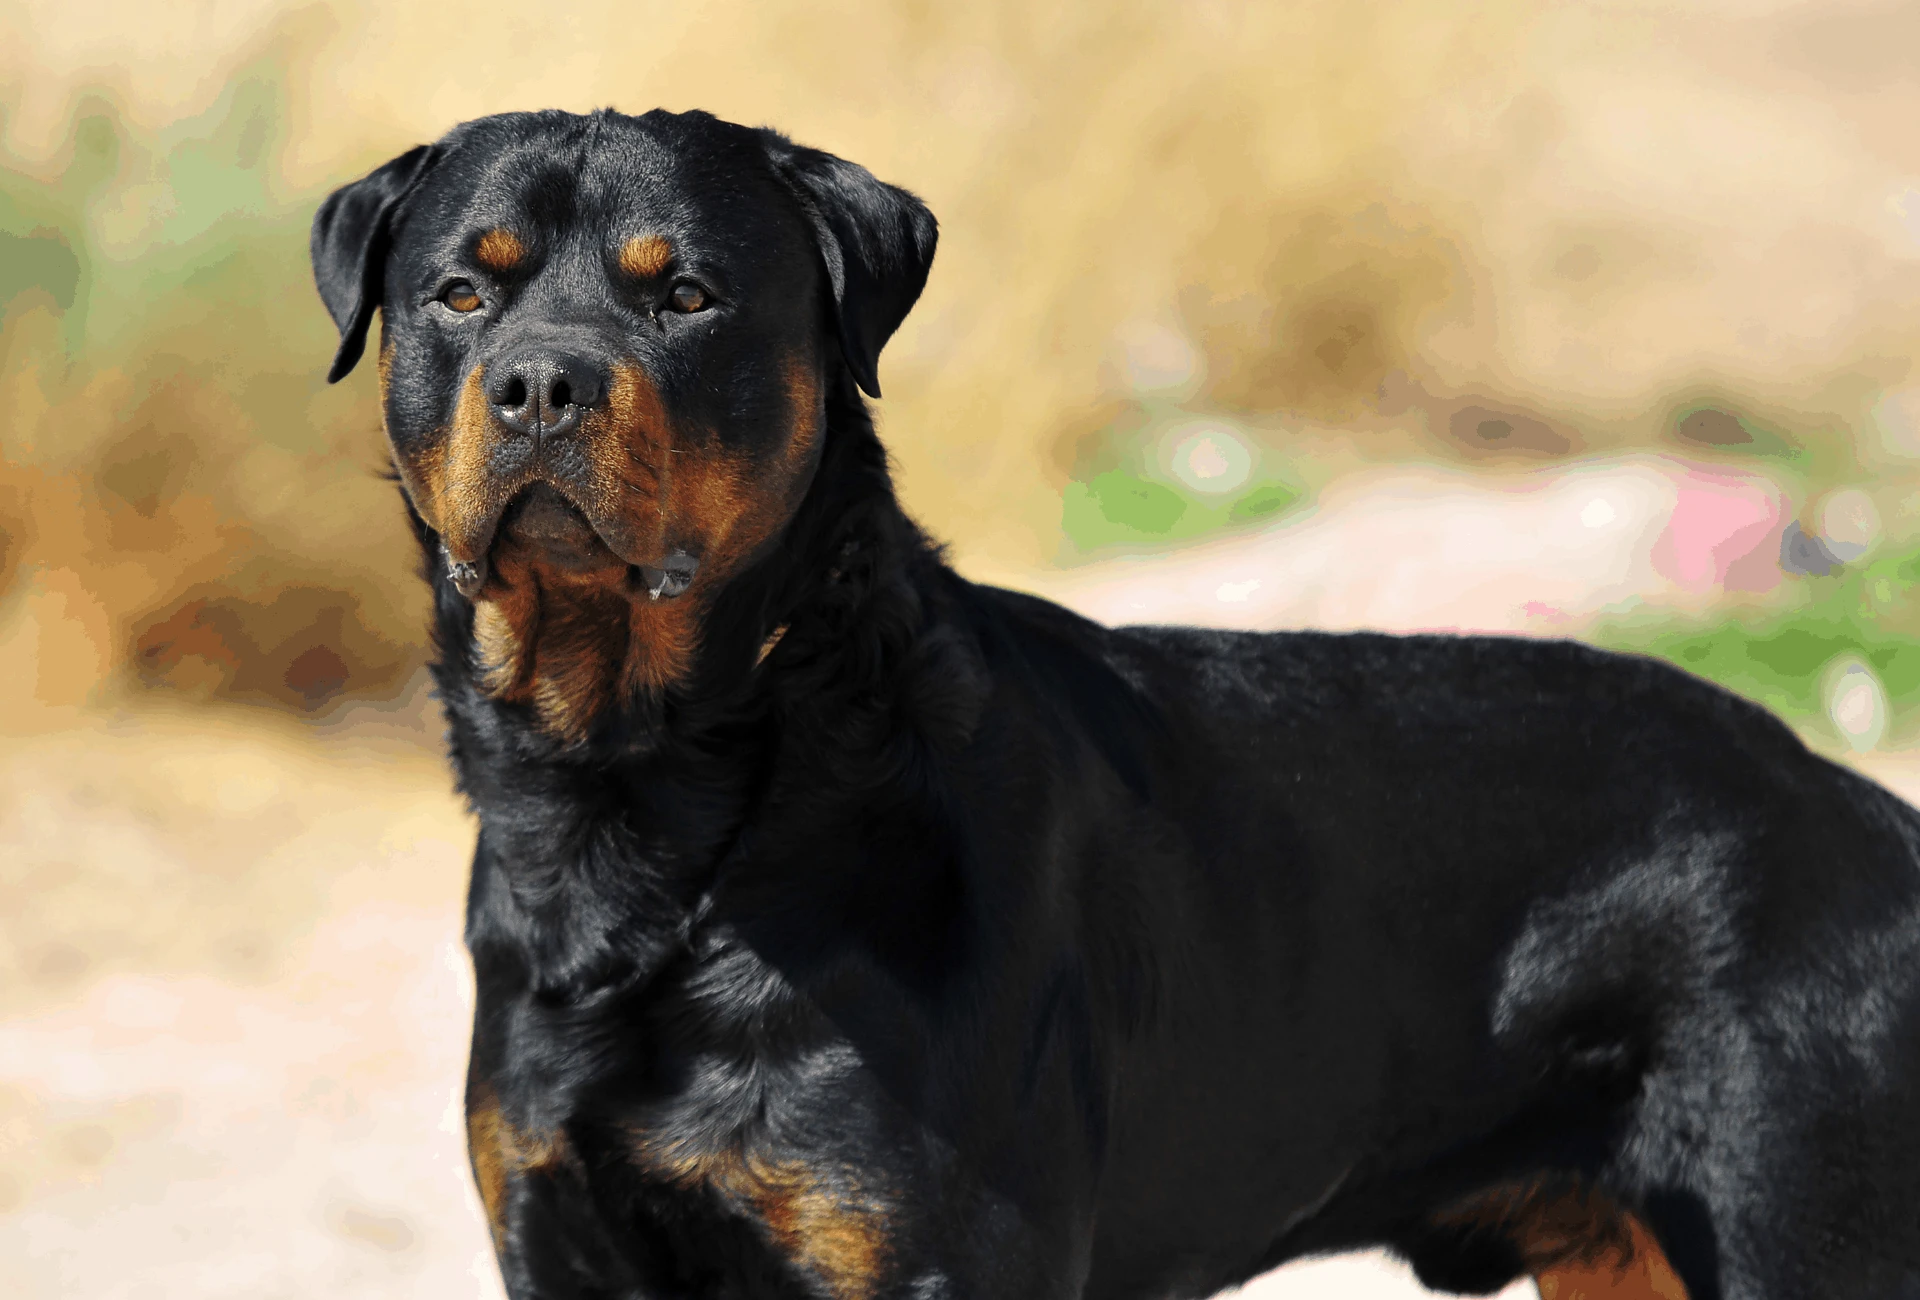

1/1 [==============================] - 0s 21ms/step


'Rottweiler'

In [ ]:
image_path = '/content/drive/MyDrive/general_assembly/capstone/image/sample5.jpg'
display(Image(filename=image_path, width=300))
classify_dog_breed_image(image_path, model, categories)

### Prediction output: top 3 dog breeds with their respective percentages.

In [ ]:
def classify_dog_breeds_image(image_path, model, class_labels, top_n=3):
    '''
    Takes an image path, model, and class labels as input and produces the name of the breed
    and top 3 dog breeds with their respective percentages
    '''
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))
    img_array = np.array(img)
    img_array_norm = img_array / 255.0

    preds = model.predict(np.expand_dims(img_array_norm, axis=0))
    predicted_class_index = np.argmax(preds)
    predicted_class_label = class_labels[predicted_class_index]
    predicted_class_label = predicted_class_label.replace('_', ' ').title()

    print(f'Your dog is a {predicted_class_label}')

    top_indices = np.argsort(preds[0])[::-1][:top_n]
    top_probabilities = preds[0][top_indices]
    top_labels = [class_labels[i] for i in top_indices]
    top_predictions = [(label, probability) for label, probability in zip(top_labels, top_probabilities)]

    for i in range(len(top_predictions)):
      breed = top_predictions[i][0].replace('_', ' ').title()
      percentage = round(float(top_predictions[i][1]), 2)
      print(f'{breed}: {percentage}%')

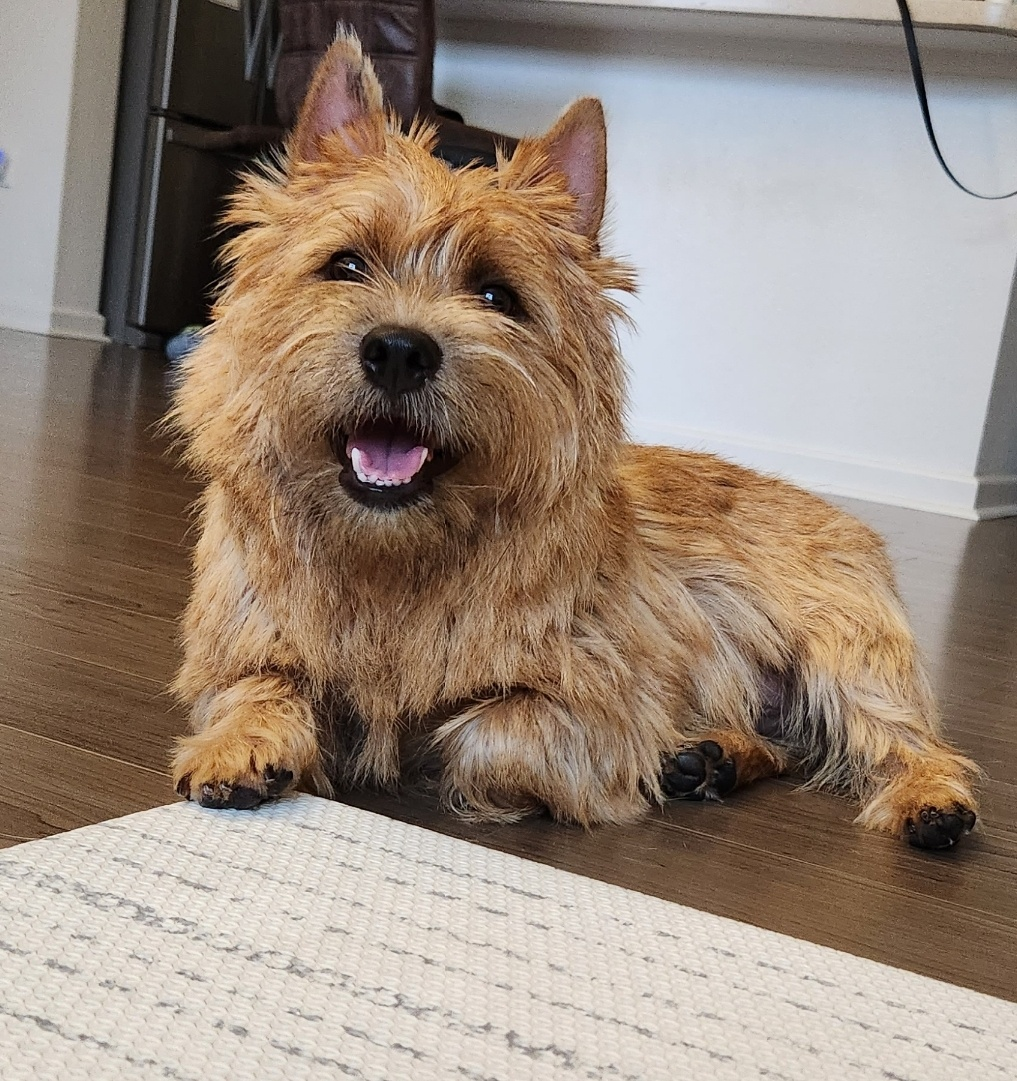

1/1 [==============================] - 0s 23ms/step
Your dog is a Norwich Terrier
Norwich Terrier: 0.96%
Cairn: 0.02%
Wire Haired Fox Terrier: 0.0%


In [ ]:
image_path = '/content/drive/MyDrive/general_assembly/capstone/image/sample1.jpg'
display(Image(filename=image_path, width=300))
classify_dog_breeds_image(image_path, model, categories, 3)

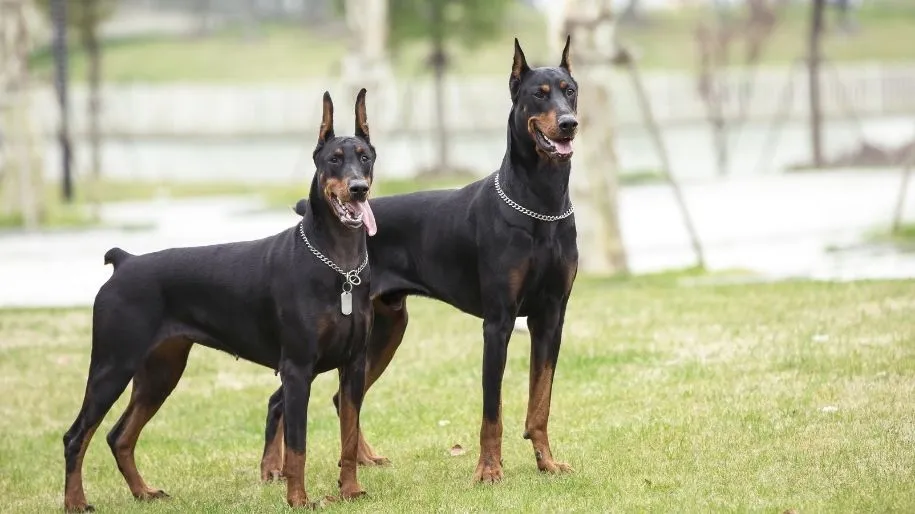

1/1 [==============================] - 0s 21ms/step
Your dog is a Doberman
Doberman: 1.0%
Black And Tan Coonhound: 0.0%
Malamute: 0.0%


In [ ]:
image_path = '/content/drive/MyDrive/general_assembly/capstone/image/sample2.jpg'
display(Image(filename=image_path, width=300))
classify_dog_breeds_image(image_path, model, categories, 3)

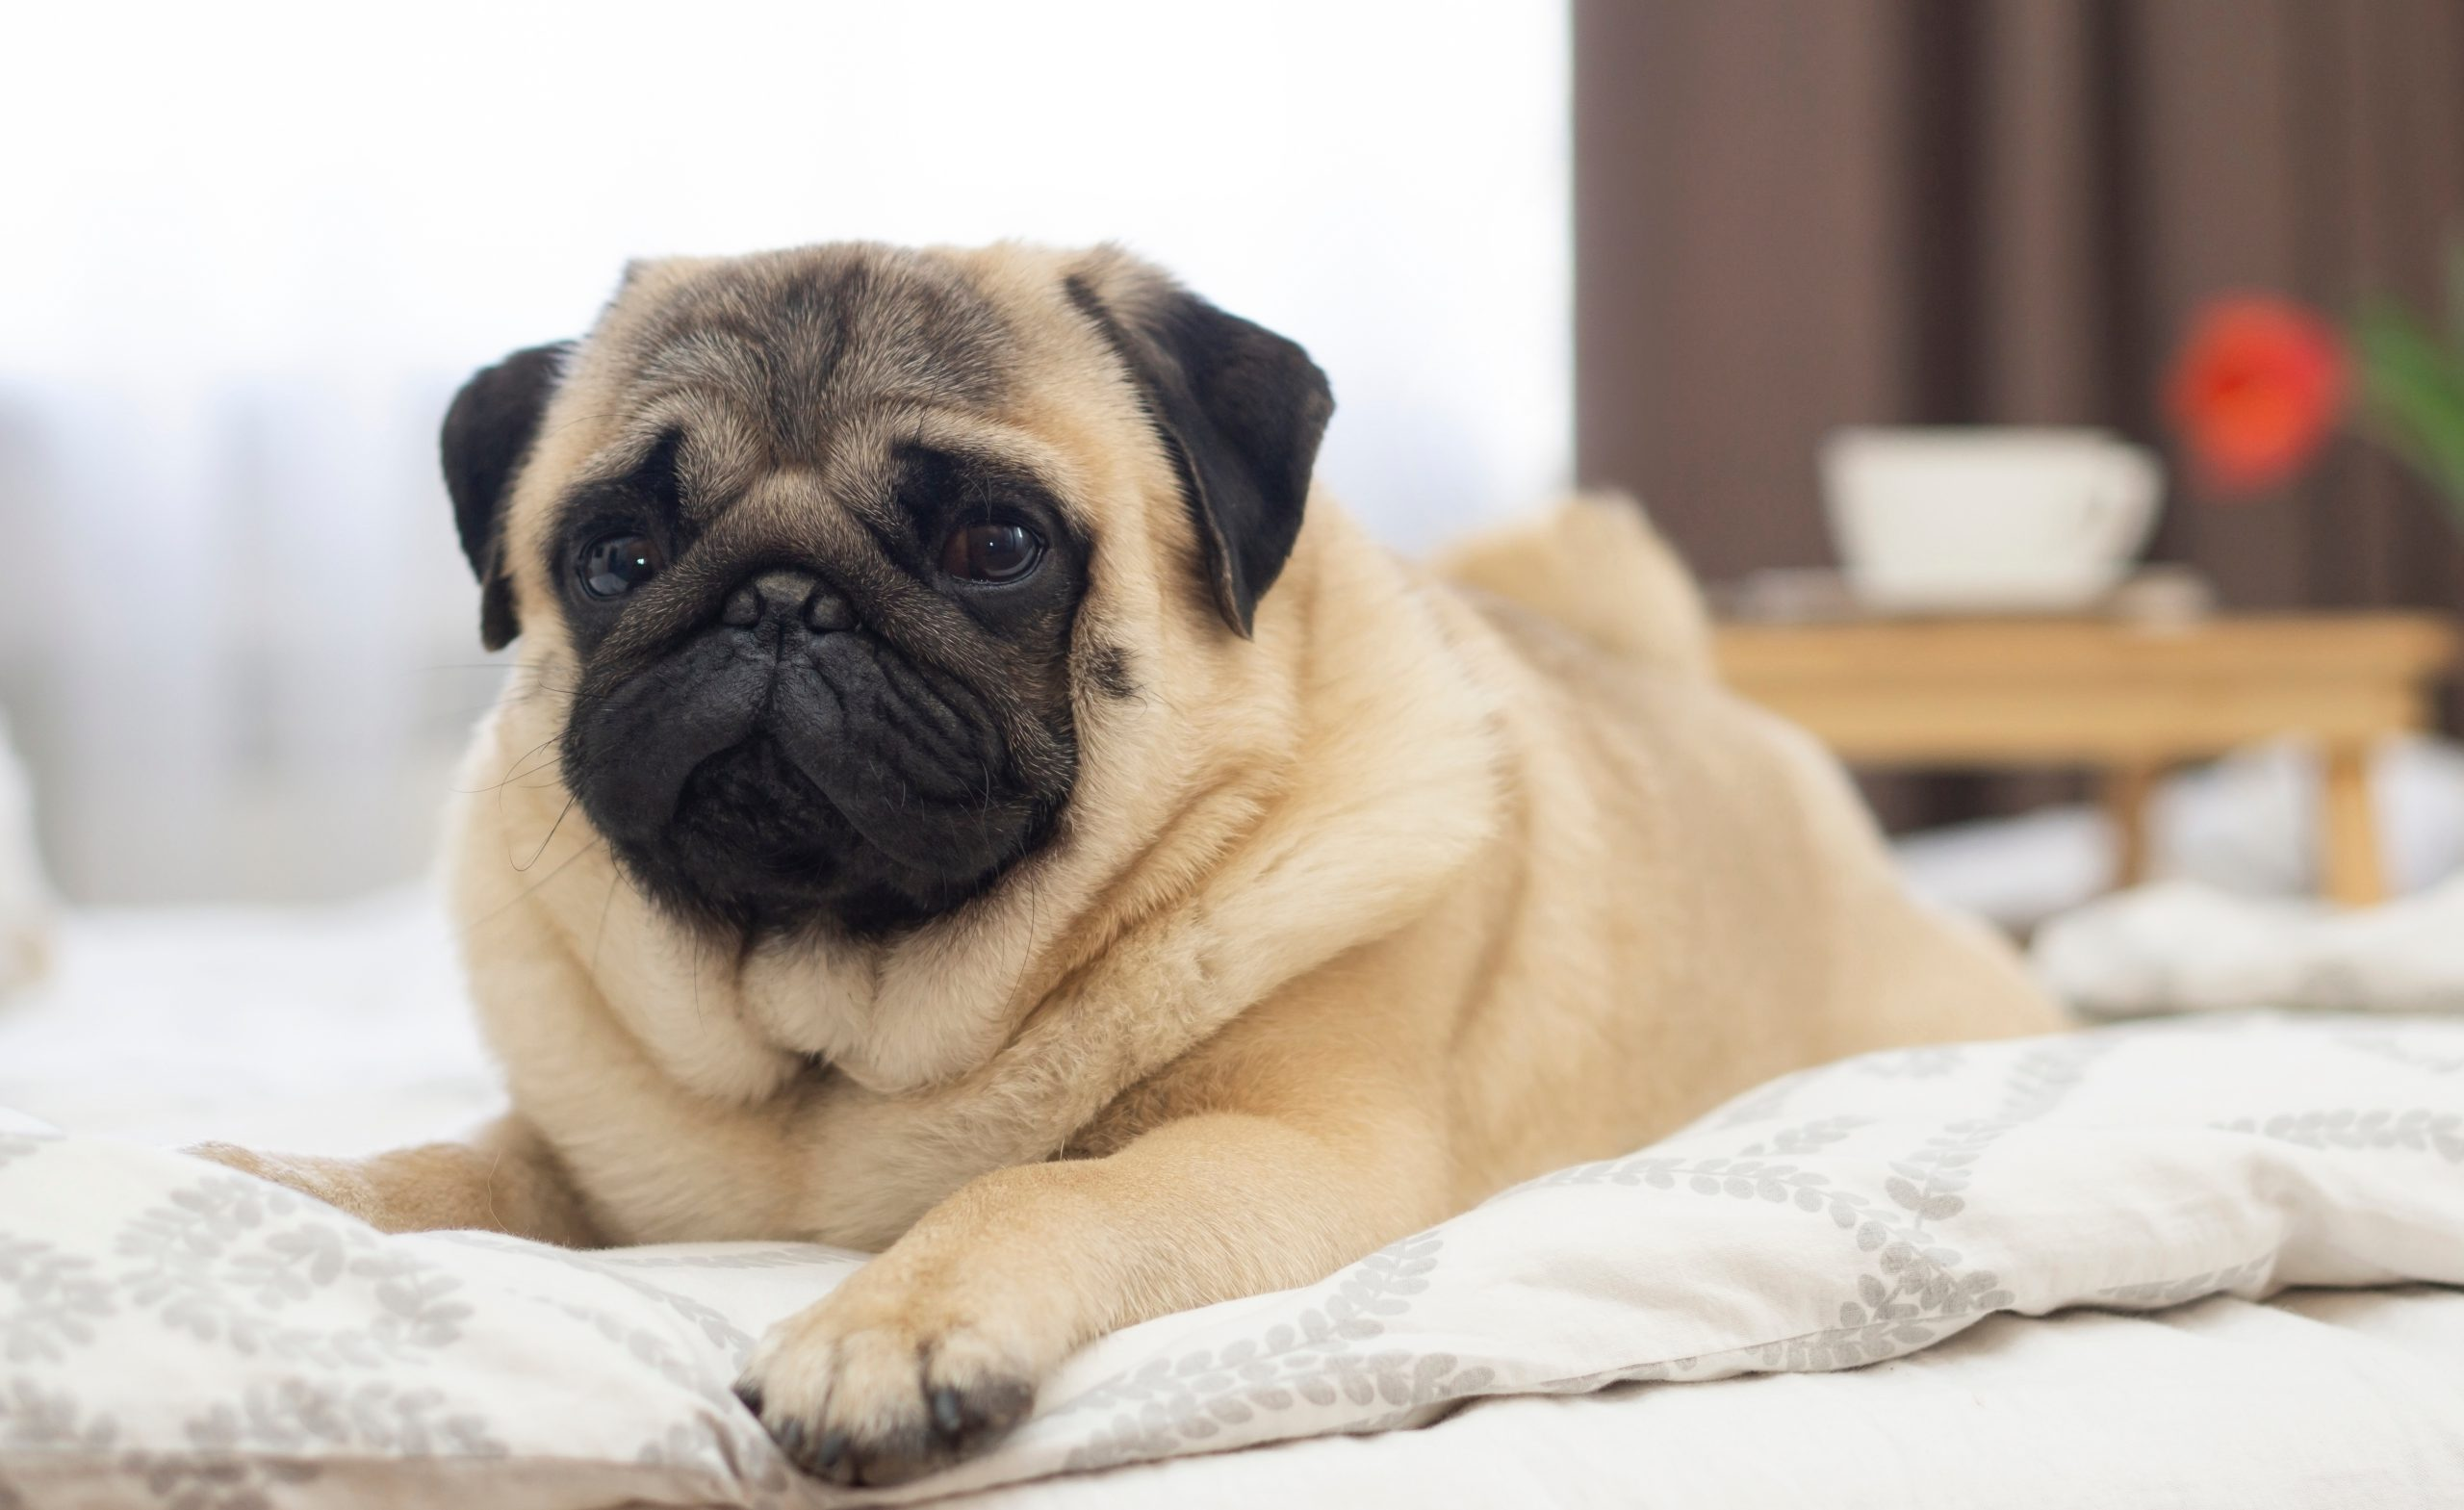

1/1 [==============================] - 0s 21ms/step
Your dog is a Pug
Pug: 0.98%
Brabancon Griffon: 0.01%
Bull Mastiff: 0.0%


In [ ]:
image_path = '/content/drive/MyDrive/general_assembly/capstone/image/sample3.jpg'
display(Image(filename=image_path, width=300))
classify_dog_breeds_image(image_path, model, categories, 3)

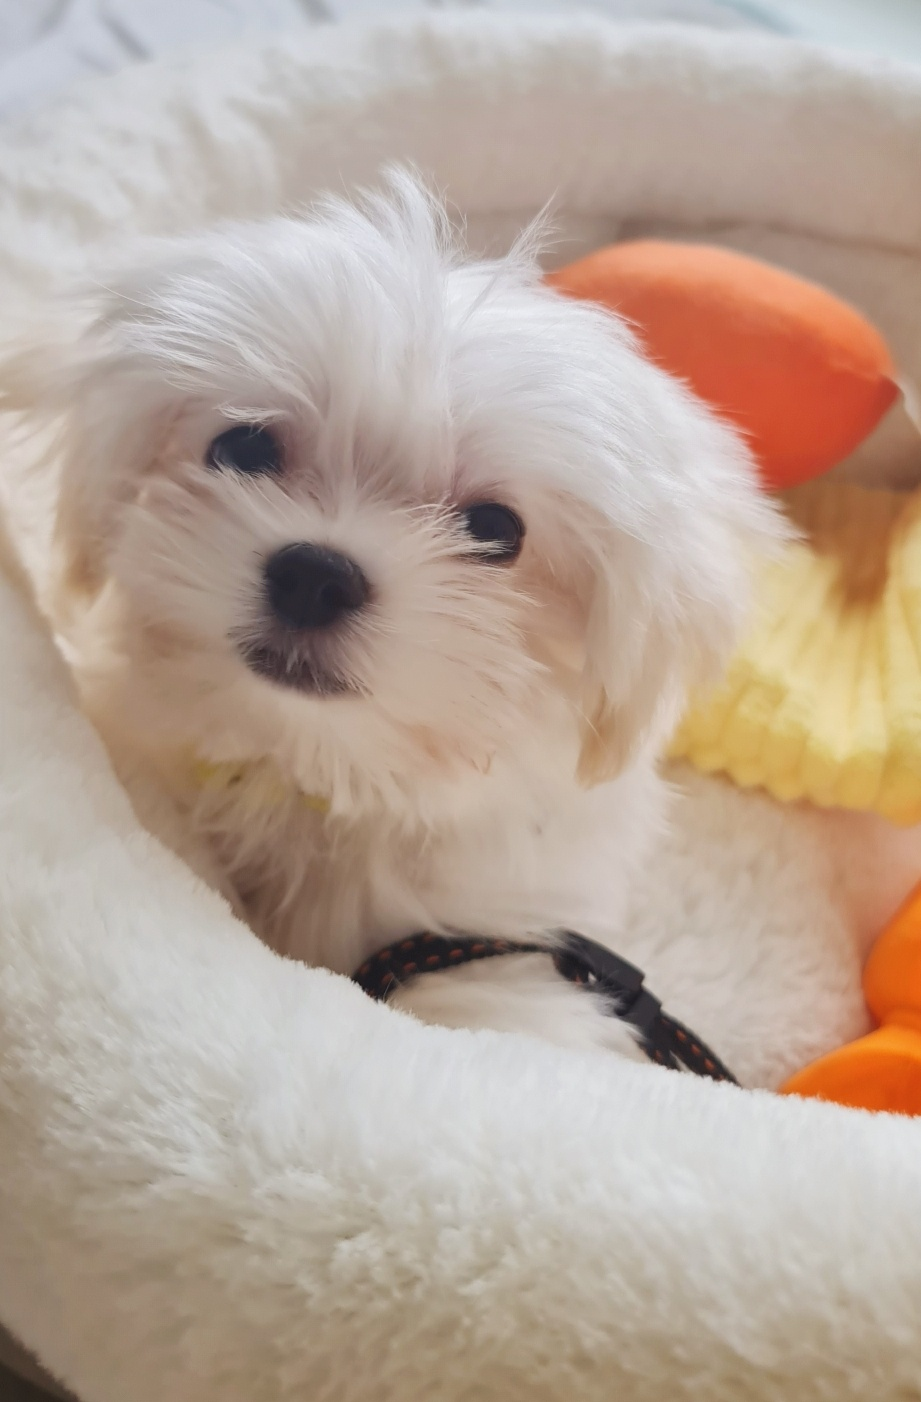

1/1 [==============================] - 0s 25ms/step
Your dog is a Maltese
Maltese: 1.0%
Cairn: 0.0%
Pekinese: 0.0%


In [ ]:
image_path = '/content/drive/MyDrive/general_assembly/capstone/image/sample4.jpg'
display(Image(filename=image_path, width=300))
classify_dog_breeds_image(image_path, model, categories, 3)

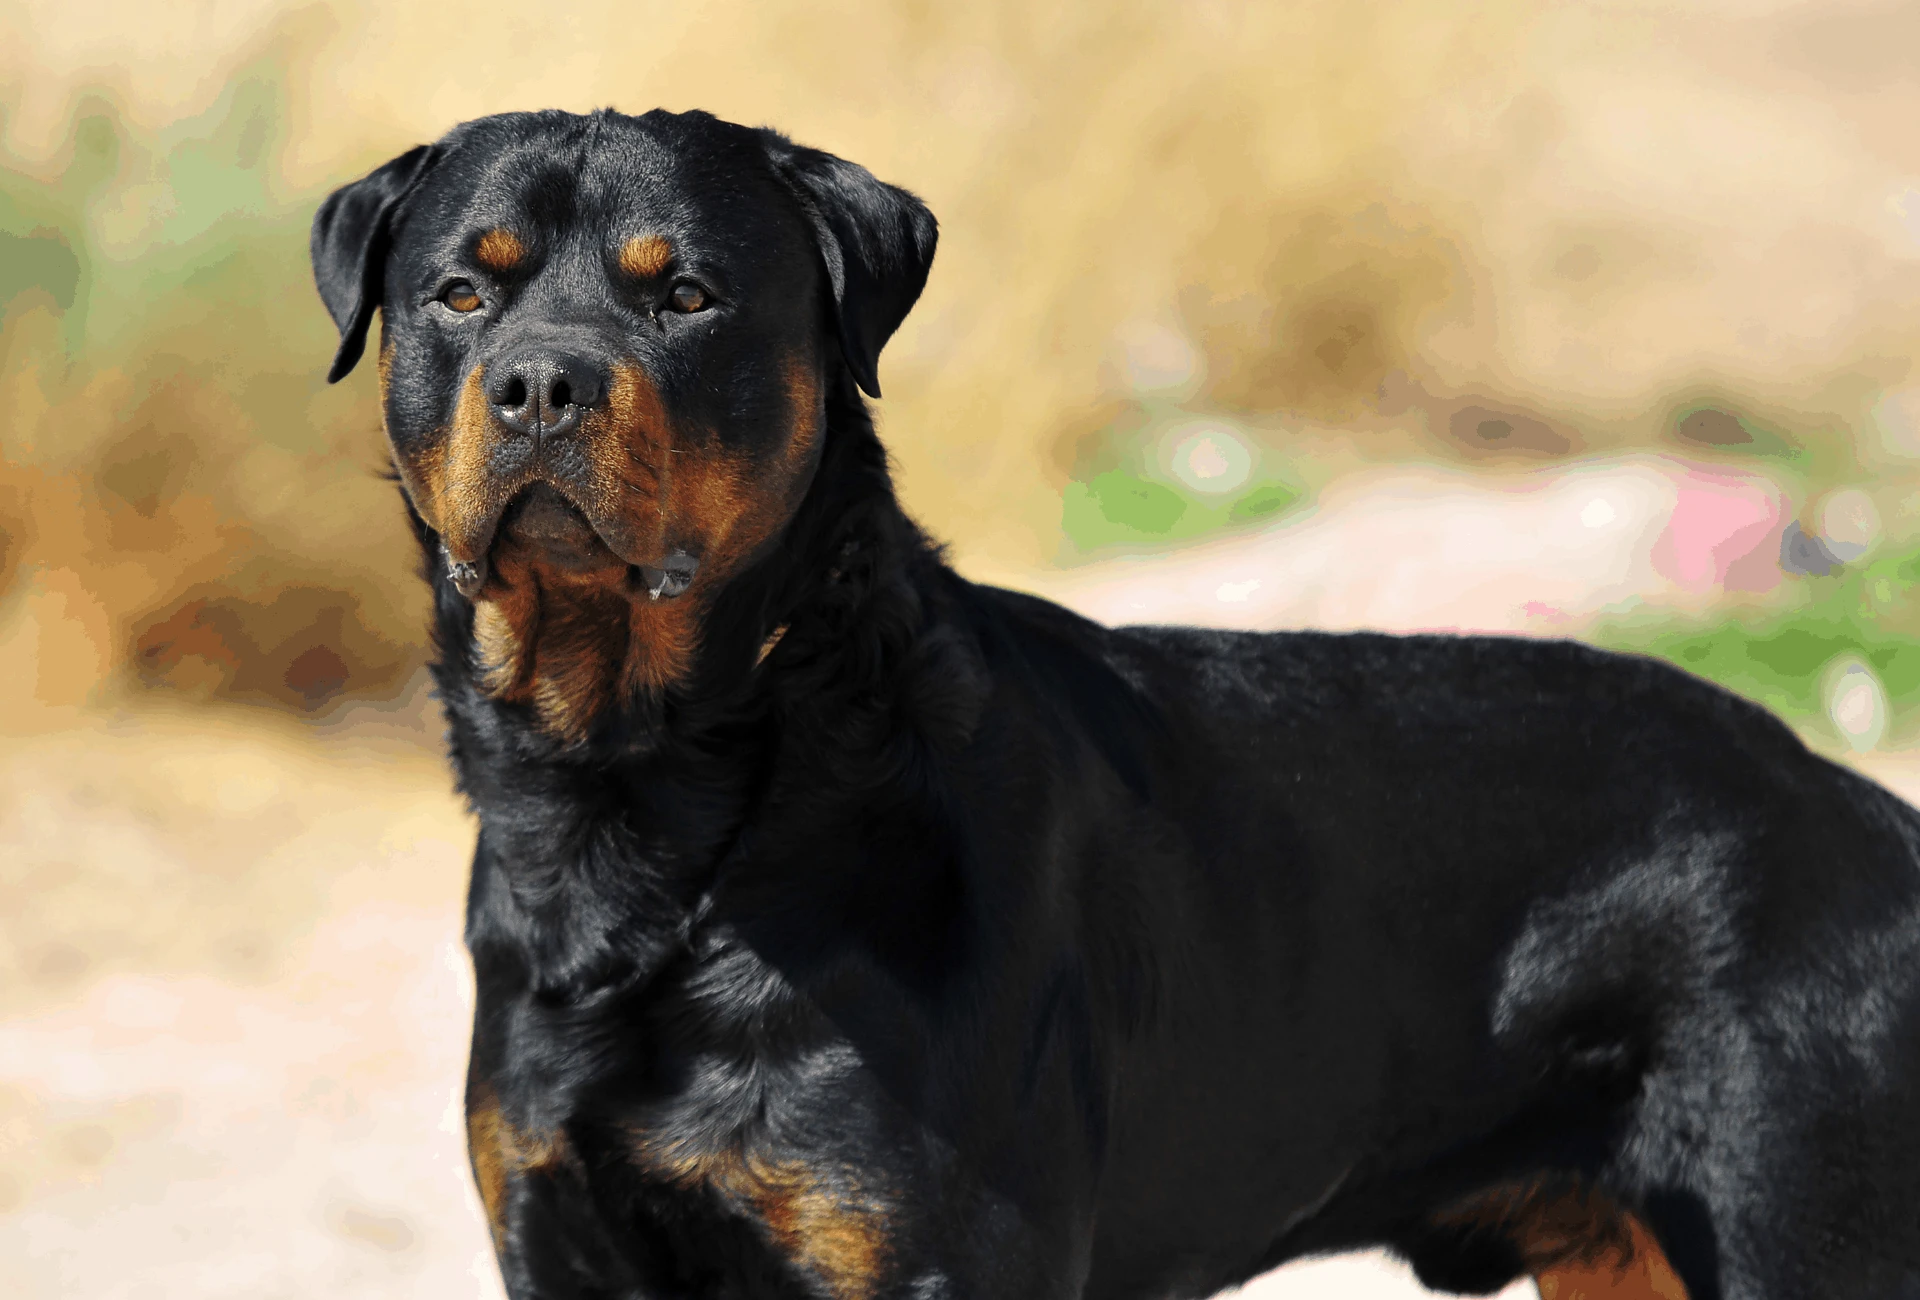

1/1 [==============================] - 0s 21ms/step
Your dog is a Rottweiler
Rottweiler: 0.98%
Labrador Retriever: 0.0%
Doberman: 0.0%


In [ ]:
image_path = '/content/drive/MyDrive/general_assembly/capstone/image/sample5.jpg'
display(Image(filename=image_path, width=300))
classify_dog_breeds_image(image_path, model, categories, 3)

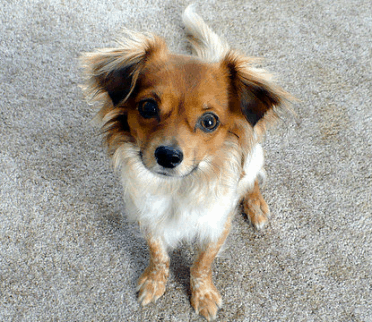

1/1 [==============================] - 0s 24ms/step
Your dog is a Papillon
Papillon: 0.62%
Pomeranian: 0.09%
Japanese Spaniel: 0.02%


In [ ]:
# Mixed breed

image_path = '/content/drive/MyDrive/general_assembly/capstone/image/sample7.jpg'
display(Image(filename=image_path, width=300))
classify_dog_breeds_image(image_path, model, categories, 3)

### Real time classifier using Webcam

reference:
 - https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html
 - https://www.geeksforgeeks.org/python-opencv-capture-video-from-camera/
 - https://stackoverflow.com/questions/49188702/how-to-use-a-webcam-for-image-classifier
 - https://medium.com/@jinilcs/a-simple-keras-model-on-my-laptop-webcam-dda77521e6a0

reference (opening camera on Colab)
 - https://stackoverflow.com/questions/54389727/opening-web-camera-in-google-colab

In [ ]:
# Function to classify dog breeds
def classify_dog_breeds_webcam(image, model, class_labels, top_n=3):
    img_array = np.array(image)
    # img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) ## Removing this line resulted in better prediction
    img_array = cv2.resize(img_array, (299, 299))
    img_array_norm = img_array / 255.0

    # Make predictions
    preds = model.predict(np.expand_dims(img_array_norm, axis=0))
    predicted_class_index = np.argmax(preds)
    predicted_class_label = class_labels[predicted_class_index].replace('_', ' ').title()

    top_predictions = []

    top_indices = np.argsort(preds[0])[::-1][:top_n]
    top_probabilities = preds[0][top_indices]
    top_labels = [class_labels[i].replace('_', ' ').title() for i in top_indices]

    for i in range(len(top_labels)):
        breed = top_labels[i]
        percentage = round(float(top_probabilities[i]) * 100, 2)
        top_predictions.append(f'{breed}: {percentage}%')

    return predicted_class_label, top_predictions

In [ ]:
# reference (opening camera on Colab)
# https://stackoverflow.com/questions/54389727/opening-web-camera-in-google-colab

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import io
from PIL import Image

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  image = Image.open(io.BytesIO(binary))
  return image

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 25ms/step


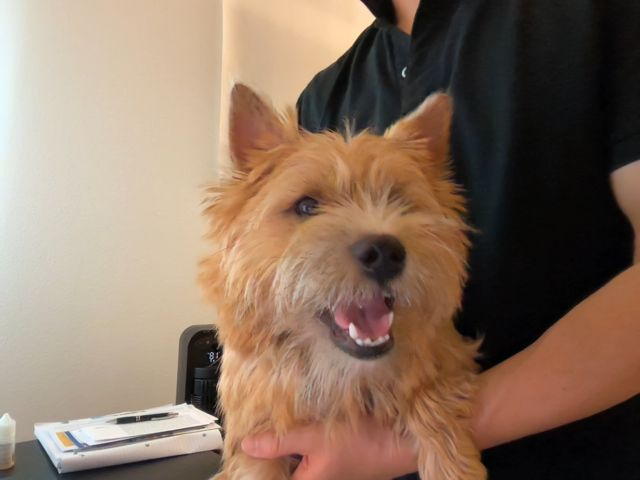

Predicted Dog Breed:
Norwich Terrier
Top Predictions:
Norwich Terrier: 89.61%
Norfolk Terrier: 2.97%
Cairn: 2.62%


In [ ]:
# take picture using webcam
image = take_photo()

# breed classification
predicted_class, predictions = classify_dog_breeds_webcam(image, model, categories, top_n=3)

display(image)
print("Predicted Dog Breed:")
print(predicted_class)
print("Top Predictions:")
for prediction in predictions:
    print(prediction)

## **Task1: Conclusion**

Utilizing pre-trained models to build a custom image classifier resulted in significantly superior performance compared to constructing a model from scratch. Among the three well-known pre-trained models used for this task, Xception outperformed the others. VGG16 failed to converge, and while ResNet50 achieved substantial improvements over VGG16, it still showed signs of underfitting.

Summary of model performance trained using Xception:
- train accuracy: 0.87
- validation accuracy: 0.85
- test accuracy: 0.90
- precision: 0.91
- recall: 0.90
- f1 score: 0.90
- total number of parameters: ~21 million

The superior performance of Xception can likely be attributed to its unique architecture, which includes a depthwise separable convolutional layer, a departure from traditional CNN designs. This innovative approach significantly reduces the number of parameters, making Xception more memory and computationally efficient, helping to prevent overfitting and accelerate training. On the other hand, VGG16 is known for its deep architecture with numerous layers, which can hinder convergence due to vanishing gradients. As for ResNet50, its residual connections, while effective in mitigating vanishing gradients, may lead to underfitting when the dataset is not extensive enough, as was the case for this task.

source: https://pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/


----